Team members: Erifeoluwa Jamgbadi and Krunal Rathod

In [1653]:
###import statements

import pandas as pd
import numpy as np
import cv2
import itertools
import matplotlib.pyplot as plt

In [1654]:
###creating the python dictionary to store the slopes
slopeDictionary = dict()
linesDictionary = []

In [1655]:
###to be able to view the image in colour
img = cv2.imread("house1.png", cv2.IMREAD_COLOR)

In [1656]:
# #to view the image
# cv2.imshow("image", img)
# cv2.waitKey(0)
 
# # It is for removing/deleting created GUI window from screen
# # and memory
# cv2.destroyAllWindows()

<br>

PART 1

<br>

In [1657]:
###Identify at least two sets of parallel lines in this house front

##using the hough transform method and it only works on grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [1658]:
# edge detection algorithm to the grayscale image. In this example, we will use the Canny edge detection algorithm
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

In [1659]:

#### to get all the lines in the image and
## calculate the slope
def getParallelLines(img, lines):
    #https://hackthedeveloper.com/line-detection-opencv-python/
    i=0
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        
        ##to calculate the slope, so it can be used to get which lines are parallel
        ##to remove the devision by 0 error that shows up
        if (x2- x1) == 0:
#             slopeDictionary.update({key: 0}) 
#             linesDictionary.append({(rho, theta)})  
            continue
        else:
            key = f'key{line+1}'
            key2 = 'slope'
            rho4Dict = 'rho'
            theta4Dict = 'theta'
            slope = (y2 - y1) / (x2 - x1)
            ###making a dictionary for the slope, rho and theta, so it can be used later to draw the lines
            slopeDictionary.update({key: {key2:slope, rho4Dict: rho, theta4Dict: theta} })

        ###draws the line in the image where there are lines detected
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

In [1660]:
lines = cv2.HoughLines(edges, rho=4.5, theta=np.pi/180, threshold=110)
getParallelLines(img, lines)

# Show result
# img = cv2.resize(img, dsize=(600, 600))
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1634]:

print(f"the size of the dictionary is {len(slopeDictionary)}")
slopeDictionary.items()

the size of the dictionary is 106


dict_items([('key[[-255.5          3.4260077]]', {'slope': 1.1502669717772693, 'rho': -256.5, 'theta': 2.4260077}), ('key[[352.          2.7802358]]', {'slope': 0.21267893660531698, 'rho': 351.0, 'theta': 1.7802358}), ('key[[347.5         2.7627826]]', {'slope': 0.19418960244648317, 'rho': 346.5, 'theta': 1.7627826}), ('key[[338.5         2.7802358]]', {'slope': 0.21278772378516625, 'rho': 337.5, 'theta': 1.7802358}), ('key[[352.          1.6806784]]', {'slope': -1.2352941176470589, 'rho': 351.0, 'theta': 0.6806784}), ('key[[-404.           3.3911011]]', {'slope': 1.0726338958180484, 'rho': -405.0, 'theta': 2.3911011}), ('key[[365.5         1.6981317]]', {'slope': -1.1914396887159533, 'rho': 364.5, 'theta': 0.6981317}), ('key[[-264.5         3.443461]]', {'slope': 1.1914396887159533, 'rho': -265.5, 'theta': 2.443461}), ('key[[-413.           3.4085543]]', {'slope': 1.1114435302916978, 'rho': -414.0, 'theta': 2.4085543}), ('key[[-246.5          3.4085543]]', {'slope': 1.109865470852018,

In [1635]:
##making list so that it can store the individual variables needed to make the lines when identifying the pairs at a later p
slopeValue=[]
thetaValue=[]
rhoValue =[]
keysV = [] ###store all the key values

for keys in itertools.product(slopeDictionary.keys()):
    keysV.append(keys)
    value = slopeDictionary
    for key in keys:
        value = value[key]
#         print(value)
    thetaValue.append(value.get('theta'))
    slopeValue.append(value.get('slope'))
    rhoValue.append(value.get('rho'))
print(f"Keys: {keysV}, \n\nTheta: {thetaValue},\n\n Rho: {rhoValue},\n\n slope: {slopeValue}")


Keys: [('key[[-255.5          3.4260077]]',), ('key[[352.          2.7802358]]',), ('key[[347.5         2.7627826]]',), ('key[[338.5         2.7802358]]',), ('key[[352.          1.6806784]]',), ('key[[-404.           3.3911011]]',), ('key[[365.5         1.6981317]]',), ('key[[-264.5         3.443461]]',), ('key[[-413.           3.4085543]]',), ('key[[-246.5          3.4085543]]',), ('key[[676.          2.1519175]]',), ('key[[667.          2.1693707]]',), ('key[[361.          2.7627826]]',), ('key[[-269.           3.4609141]]',), ('key[[329.5         2.4137168]]',), ('key[[347.5        1.715585]]',), ('key[[329.5        2.797689]]',), ('key[[356.5         2.7453294]]',), ('key[[352.        2.37881]]',), ('key[[50.5        2.5882497]]',), ('key[[568.          1.0174533]]',), ('key[[338.5         2.3962634]]',), ('key[[343.         2.797689]]',), ('key[[-381.5          3.3561945]]',), ('key[[-278.           4.1241393]]',), ('key[[640.          2.1868238]]',), ('key[[361.          2.361356

In [1636]:
len(slopeValue)

106

In [1637]:
df = pd.DataFrame()

In [1661]:
##to get the pairs of parallel lines in the image

keysIndex = []   ###stores all the sets of keys that are parallel matching pairs

##to find the slopes which are the same
counter = 0
storeIndex = []
for i in range(len(slopeValue)):
        for j in range(i, len(slopeValue)):
            ##checks if the values are the same
            ##wherever the values are the same and the keys(index) not the sameit means the lines are parallel
            if slopeValue[i] == slopeValue[j] and i != j:
                counter+=1
                print(f"Parallel lines found: ({slopeValue[i]}, {slopeValue[j]}) at index {i} and {j}")
                storeIndex.append(i)
                storeIndex.append(j)
                keysIndex.append((keysV[i], keysV[j]))
        
                ###added the values into the dataframe
                df.loc[i, 'rho'] = rhoValue[i]
                df.loc[i, 'theta'] = thetaValue[i]
                df.loc[i, 'slope'] = slopeValue[i]
                df.loc[i, 'key'] = keysV[i]
                df.loc[j, 'rho'] = rhoValue[j]
                df.loc[j, 'theta'] = thetaValue[j]
                df.loc[j, 'slope'] = slopeValue[j]
                df.loc[j, 'key'] = keysV[j]
                

        

Parallel lines found: (1.0726338958180484, 1.0726338958180484) at index 5 and 32
Parallel lines found: (0.23100616016427106, 0.23100616016427106) at index 16 and 22
Parallel lines found: (-57.08571428571429, -57.08571428571429) at index 20 and 33
Parallel lines found: (-57.08571428571429, -57.08571428571429) at index 20 and 45
Parallel lines found: (1.0, 1.0) at index 23 and 77
Parallel lines found: (57.08571428571429, 57.08571428571429) at index 24 and 52
Parallel lines found: (-1.2804878048780488, -1.2804878048780488) at index 29 and 38
Parallel lines found: (-57.08571428571429, -57.08571428571429) at index 33 and 45
Parallel lines found: (-28.542857142857144, -28.542857142857144) at index 34 and 48
Parallel lines found: (-28.542857142857144, -28.542857142857144) at index 34 and 75
Parallel lines found: (-28.542857142857144, -28.542857142857144) at index 34 and 78
Parallel lines found: (-28.542857142857144, -28.542857142857144) at index 34 and 79
Parallel lines found: (-28.5428571428

In [1662]:
print(f"The total number of parallel pair matching found is {counter}") 

The total number of parallel pair matching found is 39


In [1663]:
###manually went through the points to see which pairs are at the front 
### NOT: storeIndex[2]:storeIndex[3],storeIndex[4]:storeIndex[5], storeIndex[14]:storeIndex[15], storeIndex[16],storeIndex[17]
##storeIndex[18]:storeIndex[19], storeIndex[20]:storeIndex[21], storeIndex[22]:storeIndex[23], storeIndex[24]:storeIndex[25], 
#storeIndex[24]:storeIndex[26], storeIndex[27]:storeIndex[28]

### IS: storeIndex[0]:storeIndex[1], storeIndex[6]:storeIndex[7],storeIndex[6]:storeIndex[7], storeIndex[10]:storeIndex[11], 
#storeIndex[12]:storeIndex[13], (storeIndex[29],storeIndex[30], storeIndex[31],storeIndex[32], storeIndex[31],storeIndex[33]),
#storeIndex[34]:storeIndex[35], storeIndex[38]:storeIndex[39]
#storeIndex[29]:storeIndex[30], storeIndex[36]:storeIndex[37], storeIndex[40]:storeIndex[41]
#storeIndex =  storeIndex[31],storeIndex[33], storeIndex[12],storeIndex[13]

#storeIndex =  storeIndex[29],storeIndex[30] YES
storeIndex =  storeIndex[36],storeIndex[37], storeIndex[40], storeIndex[41] 


In [1664]:
#### this draws only the pairs parallel lines on the img
###declared the new image again, so it redraws on this one
img = cv2.imread("house1.png", cv2.IMREAD_COLOR)

def drawPairParallel(storeIndex):
    for line in storeIndex:
        a = np.cos(thetaValue[line])
        b = np.sin(thetaValue[line])
        x0 = a*rhoValue[line]
        y0 = b*rhoValue[line]
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))
        
        
        ###draws the line in the image where there are lines detected
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 1)

    # Show result
    # img = cv2.resize(img, dsize=(600, 600))
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
###MAYBE TODO : GROUP PAIR COLOURS TOGETHER OR JUST SHOW THE SPECIFIC POINTS AT THE FRONT OF THE HOUSE
drawPairParallel(storeIndex)

In [1665]:
storeIndex

(39, 91, 41, 73)

<br>

PART 2

<br>

In [1666]:
###stores all the parallel lines
df

,rho,theta,slope,key
5,-405.0,2.391101,1.072634,key[[-404. 3.3911011]]
32,-243.0,2.391101,1.072634,key[[-242. 3.3911011]]
16,328.5,1.797689,0.231006,key[[329.5 2.797689]]
22,342.0,1.797689,0.231006,key[[343. 2.797689]]
20,567.0,0.017453,-57.085714,key[[568. 1.0174533]]
33,742.5,0.017453,-57.085714,key[[743.5 1.0174533]]
45,288.0,0.017453,-57.085714,key[[289. 1.0174533]]
23,-382.5,2.356194,1.000000,key[[-381.5 3.3561945]]
77,-220.5,2.356194,1.000000,key[[-219.5 3.3561945]]
24,-279.0,3.124139,57.085714,key[[-278. 4.1241393]]


In [1667]:
#the intersection points of these sets of parallel lines

###i want to get the points of the two lines then multiply those lines by each other
##you need rho and theta of those lines
##store the intersection points
intersectionPoints = []
#the lines 𝒍 and 𝒎 intersect at the point 𝒙 = 𝒍 × m
for i, j in keysIndex:
    print(i)
    for index, row in df.iterrows():
        
        if i == row["key"]:
            theta1, rho1 = row["theta"], row["rho"]
            
            ##now find the second line
            for index, row in df.iterrows():
                if j == row["key"]:
                    theta2, rho2 = row["theta"], row["rho"] 
        
                    A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
                    b = np.array([[rho1], [rho2]])
                
                    # solve the least squares problem for the 
                    # intersection point p: Rp = q
                    x0, y0 = np.linalg.lstsq(A, b, rcond=None)[0]
                    x0, y0 = int(np.round(x0)), int(np.round(y0))
                    intersectionPoints.append((x0, y0)) 
        else:
            continue

('key[[-404.           3.3911011]]',)
('key[[329.5        2.797689]]',)
('key[[568.          1.0174533]]',)
('key[[568.          1.0174533]]',)
('key[[-381.5          3.3561945]]',)
('key[[-278.           4.1241393]]',)
('key[[370.          1.6632252]]',)
('key[[743.5         1.0174533]]',)
('key[[748.          1.0349066]]',)
('key[[748.          1.0349066]]',)
('key[[748.          1.0349066]]',)
('key[[748.          1.0349066]]',)
('key[[748.          1.0349066]]',)
('key[[752.5         1.0523598]]',)
('key[[-399.5         4.106686]]',)
('key[[-399.5         4.106686]]',)
('key[[-399.5         4.106686]]',)
('key[[-476.           4.1241393]]',)
('key[[-476.           4.1241393]]',)
('key[[-264.5          4.0892324]]',)
('key[[221.5         2.6755161]]',)
('key[[419.5         1.0174533]]',)
('key[[419.5         1.0174533]]',)
('key[[383.5         2.6929693]]',)
('key[[496.          1.0349066]]',)
('key[[496.          1.0349066]]',)
('key[[496.          1.0349066]]',)
('key[[496.       

In [1668]:
###only putting one of the parallel sets that we chose in the dataframe
paraSet = pd.DataFrame()

for i in storeIndex:
    if i in df.index:
        paraSet.loc[i, 'rho'] = df.loc[i]["rho"]
        paraSet.loc[i, 'theta'] = df.loc[i]["theta"] 
        paraSet.loc[i, 'slope'] = df.loc[i]["slope"] 
        paraSet.loc[i, 'key'] = df.loc[i]["key"]
paraSet

,rho,theta,slope,key
39,-477.0,3.124139,57.114286,key[[-476. 4.1241393]]
91,-369.0,3.124139,57.114286,key[[-368. 4.1241393]]
41,220.5,1.675516,0.105131,key[[221.5 2.6755161]]
73,391.5,1.675516,0.105131,key[[392.5 2.6755161]]


In [1669]:
#the intersection points of these sets of parallel lines

###i want to get the points of the two lines then multiply those lines by each other
##you need rho and theta of those lines
##store the intersection points
intersectionPoints = []
#the lines 𝒍 and 𝒎 intersect at the point 𝒙 = 𝒍 × m

for index, row in paraSet.iterrows():
    theta1, rho1 = row["theta"], row["rho"]

    ##now find the second line
    for index2, row2 in paraSet.iterrows():
         ###only wanting to get the intersection of the ones which have the same slope, so they are the ones in the same set
        if index != index2 and row2["slope"] == row["slope"]:
            theta2, rho2 = row2["theta"], row2["rho"] 

            A = np.array([[np.cos(theta1), np.sin(theta1)], [np.cos(theta2), np.sin(theta2)]])
            b = np.array([[rho1], [rho2]])

            # solve the least squares problem for the 
            # intersection point p: Rp = q
            x0, y0 = np.linalg.lstsq(A, b, rcond=None)[0]
            x0, y0 = int(np.round(x0)), int(np.round(y0))
            intersectionPoints.append((x0, y0)) 


In [1670]:
##the intersection points of our parallel set chosen
intersectionPoints  = np.unique(intersectionPoints, axis=0)
intersectionPoints

array([[-32, 304],
       [423,  -7]])

In [1671]:
##the closest for these intersection points
meanPointsX = int(np.round(np.mean(intersectionPoints[0])))
meanPointsY = int(np.round(np.mean(intersectionPoints[1])))
meanPoints = (meanPointsX, meanPointsY)
meanPoints

(136, 208)

<br>

PART 3 

<br>

In [1672]:
####drawing the intersection points on the image
cv2.circle(img, intersectionPoints[0], radius=4, color=(100, 0, 255),thickness=-1)
cv2.circle(img, intersectionPoints[1], radius=4, color=(100, 0, 0),thickness=-1)

###line for connecting the intersecting points together
cv2.line(img, (intersectionPoints[0][0], intersectionPoints[0][1]), (intersectionPoints[1][0], intersectionPoints[1][1]), (0, 0, 0), 1)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [1673]:
###as to be in float format for wrap

intersectionPoints1 = np.float32(intersectionPoints[0][0])
intersectionPoints2 = np.float32(intersectionPoints[0][1])
intersectionPoints3 = np.float32(intersectionPoints[1][0])
intersectionPoints4 = np.float32(intersectionPoints[1][1])

In [1674]:
# Compute the translation vector?? not sure if this is right
dx = intersectionPoints3  - intersectionPoints1
dy = intersectionPoints4  - intersectionPoints2 

# Load the image
image = cv2.imread('input_image.jpg')

# Apply the translation transformation to the image
M = np.float32([[1, 0, intersectionPoints1], [0, 1, intersectionPoints2]])
result = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]),  flags=cv2.INTER_LINEAR)
cv2.imshow('image', result )
cv2.waitKey(0)
cv2.destroyAllWindows()

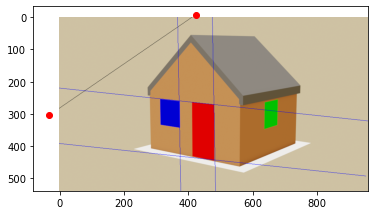

In [1675]:

# Load and plot the image
plt.imshow(img)
# Plot the intersection points
for point in intersectionPoints:
    plt.plot(point[0], point[1], 'ro') 
plt.show()

Since the window is 1m^2, then the length and width of the window is 1m^2 by themselves.<br><br>
The door area would be 2m^2, since the height is double the size of the window height, so the height of the door would be 2m^2 and the width is the same as the window width, so the width of the door is 1m^2.